Se carga el dataset que se utilizara

In [1]:
from pandas import DataFrame
import pandas as pd

dataset =  DataFrame(pd.read_csv('windserie.csv', header=None))
print(dataset.head)

<bound method NDFrame.head of          0
0      6.0
1      7.1
2     10.0
3      6.9
4      8.4
5      8.9
6      6.7
7      7.6
8      3.9
9      4.9
10     3.6
11     3.4
12     2.7
13     2.2
14     3.0
15     2.6
16     3.0
17     2.7
18     4.0
19     3.8
20     3.9
21     5.8
22     7.2
23     6.8
24     5.9
25     6.4
26     6.7
27     7.6
28     6.9
29     4.8
...    ...
4212   3.4
4213   4.2
4214   4.8
4215   2.3
4216   3.0
4217   2.7
4218   3.0
4219   2.6
4220   2.5
4221   3.3
4222   7.7
4223   9.7
4224  12.7
4225  13.2
4226  12.7
4227  15.8
4228  13.6
4229   9.1
4230   5.3
4231   2.8
4232   5.0
4233   4.5
4234   3.3
4235   3.4
4236   3.4
4237   2.8
4238   2.5
4239   2.4
4240   2.9
4241   2.8

[4242 rows x 1 columns]>


Se aplica media movil en los datos.

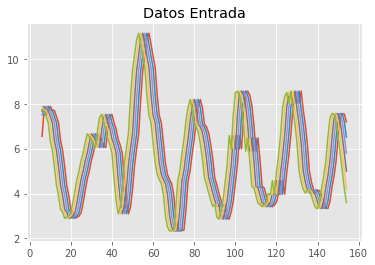

<Figure size 2560x1920 with 0 Axes>

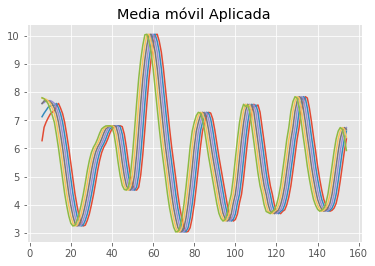

<Figure size 2560x1920 with 0 Axes>

In [10]:
from matplotlib import pyplot

pyplot.style.use("ggplot")
pyplot.plot(dataset[1:150])
pyplot.title('Datos Entrada')
pyplot.figure(num=None, figsize=(8, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.show()

dataset=dataset.rolling(window=8, min_periods=1).mean()

pyplot.plot(dataset[1:150])
pyplot.title('Media móvil Aplicada')
pyplot.figure(num=None, figsize=(8, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.show()

Se define el tamaño de ventana que tendra la serie de tiempos, y se transforma a una colección de datos para el entrenamiento supervisado de la red.

In [11]:
import Tools as tls

size = 56

dataset = tls.series_to_supervised(dataset,size, n_out=1, dropnan = True)
print(dataset)

      var1(t-56)  var2(t-56)  var3(t-56)  var4(t-56)  var5(t-56)  var6(t-56)  \
61      6.000000    6.550000    7.700000    7.500000    7.680000    7.883333   
62      6.275000    7.125000    7.600000    7.590000    7.781667    7.798810   
63      6.750000    7.250000    7.626667    7.687778    7.759206    7.765873   
64      6.937500    7.357500    7.690833    7.694405    7.744405    7.683780   
65      7.086000    7.462667    7.695524    7.695524    7.683024    7.579524   
66      7.218889    7.504603    7.696270    7.652520    7.596270    7.376687   
67      7.289660    7.532517    7.659303    7.582517    7.420017    7.169303   
68      7.340952    7.520640    7.597202    7.430015    7.233140    6.924702   
69      7.520640    7.597202    7.430015    7.233140    6.924702    6.486161   
70      7.597202    7.430015    7.233140    6.924702    6.486161    6.010937   
71      7.430015    7.233140    6.924702    6.486161    6.010937    5.459375   
72      7.233140    6.924702    6.486161

Se normalizan los datos entre 0 y 1

In [12]:
from sklearn import preprocessing

datasetnorm = preprocessing.minmax_scale(dataset, feature_range=(0, 1))
print(datasetnorm)
datasetnorm = DataFrame(datasetnorm)
print(datasetnorm.head)

[[0.37505232 0.40452072 0.46613646 ... 0.55830892 0.52741733 0.48874006]
 [0.38978652 0.43532859 0.46077857 ... 0.52741733 0.48874006 0.44989535]
 [0.4152365  0.44202595 0.46220734 ... 0.48874006 0.44989535 0.41322729]
 ...
 [0.46195061 0.55604856 0.65893679 ... 0.46990373 0.41598995 0.36751779]
 [0.55604856 0.65893679 0.76601088 ... 0.41598995 0.36751779 0.32373378]
 [0.65893679 0.76601088 0.85056509 ... 0.36751779 0.32373378 0.28580996]]
<bound method NDFrame.head of            0         1         2         3         4         5         6    \
0     0.375052  0.404521  0.466136  0.455421  0.465065  0.475959  0.389787   
1     0.389787  0.435329  0.460779  0.460243  0.470512  0.471431  0.415237   
2     0.415237  0.442026  0.462207  0.465482  0.469309  0.469666  0.425283   
3     0.425283  0.447786  0.465645  0.465837  0.468516  0.465267  0.433239   
4     0.433239  0.453420  0.465897  0.465897  0.465227  0.459681  0.440359   
5     0.440359  0.455667  0.465937  0.463593  0.460579  0.

Preparamos los datos para alimentar la red para entrenamiento y prueba.

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

zy = datasetnorm.iloc[:, -1:]
zx = datasetnorm.iloc[:, :-1].values
X = np.array(zx, dtype='float64')
y = np.array(zy, dtype='float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20)

print(X_train.shape, y_train.shape) 

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
y_train = y_train.reshape((y_train.shape[0], 1, y_train.shape[1]))
y_test = y_test.reshape((y_test.shape[0], 1, y_test.shape[1]))

print(X_train.shape, y_train.shape) 

(2926, 341) (2926, 1)
(2926, 1, 341) (2926, 1, 1)


Contruimos nuestro modelo y compilamos

In [14]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(8, activation = 'relu', input_shape=(X_train.shape[1], X_train.shape[2]))) # importante declarar correctamente shape
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'adam', metrics=['mse','mae'])

Entrenamos nuestro modelo y guardamos datos en "history"

In [15]:
history = model.fit(X_train, y_train, epochs=50, batch_size=24, validation_data=(X_test, y_test), verbose=1, shuffle=False)

Train on 2926 samples, validate on 1255 samples
Epoch 1/50
2926/2926 [==============================] - 0s 117us/step - loss: 0.0089 - mean_squared_error: 0.0089 - mean_absolute_error: 0.0636 - val_loss: 0.0043 - val_mean_squared_error: 0.0043 - val_mean_absolute_error: 0.0474
Epoch 2/50
2926/2926 [==============================] - 0s 36us/step - loss: 0.0025 - mean_squared_error: 0.0025 - mean_absolute_error: 0.0352 - val_loss: 0.0020 - val_mean_squared_error: 0.0020 - val_mean_absolute_error: 0.0319
Epoch 3/50
2926/2926 [==============================] - 0s 34us/step - loss: 0.0015 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0279 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0267
Epoch 4/50
2926/2926 [==============================] - 0s 34us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0242 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0243
Epoch 5/50
2926/2926 [=============

2926/2926 [==============================] - 0s 35us/step - loss: 1.9366e-04 - mean_squared_error: 1.9366e-04 - mean_absolute_error: 0.0105 - val_loss: 1.3523e-04 - val_mean_squared_error: 1.3523e-04 - val_mean_absolute_error: 0.0085
Epoch 35/50
2926/2926 [==============================] - 0s 35us/step - loss: 1.8937e-04 - mean_squared_error: 1.8937e-04 - mean_absolute_error: 0.0104 - val_loss: 1.2640e-04 - val_mean_squared_error: 1.2640e-04 - val_mean_absolute_error: 0.0082
Epoch 36/50
2926/2926 [==============================] - 0s 36us/step - loss: 1.8557e-04 - mean_squared_error: 1.8557e-04 - mean_absolute_error: 0.0104 - val_loss: 1.2483e-04 - val_mean_squared_error: 1.2483e-04 - val_mean_absolute_error: 0.0083
Epoch 37/50
2926/2926 [==============================] - 0s 34us/step - loss: 1.8170e-04 - mean_squared_error: 1.8170e-04 - mean_absolute_error: 0.0103 - val_loss: 1.3170e-04 - val_mean_squared_error: 1.3170e-04 - val_mean_absolute_error: 0.0087
Epoch 38/50
2926/2926 [=====

Graficamos...

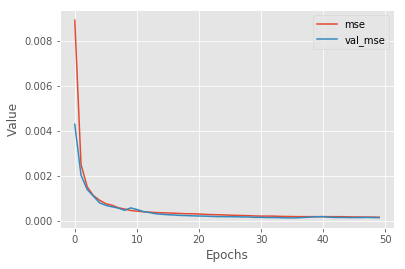

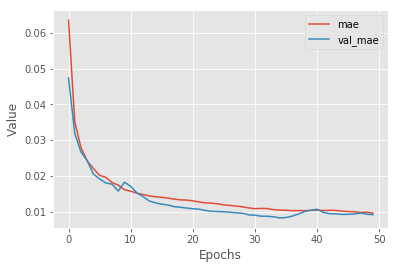

In [16]:
pyplot.style.use("ggplot")
pyplot.plot(history.history['mean_squared_error'], label='mse')
pyplot.plot(history.history['val_mean_squared_error'], label='val_mse')
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()
pyplot.plot(history.history["mean_absolute_error"], label="mae")
pyplot.plot(history.history["val_mean_absolute_error"], label="val_mae")
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()

Se realiza una predicción con los datos de prueba, y estos son comparados.

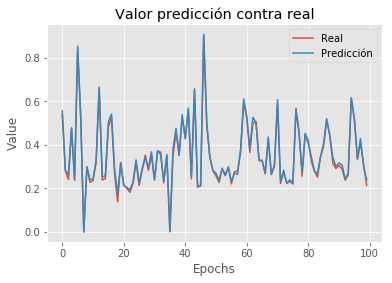

<Figure size 2560x1920 with 0 Axes>

In [17]:
predictions = model.predict(X_test, 10, verbose=2)
predicted = predictions.transpose(2,0,1).reshape(-1,predictions.shape[1])
y_test = y_test.transpose(2,0,1).reshape(-1,y_test.shape[1])

pyplot.plot(y_test[0:100,], label='Real')
pyplot.plot(predicted[0:100,], label='Predicción')
pyplot.title('Valor predicción contra real')
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.figure(num=None, figsize=(8, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.show()